In [825]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings("ignore")
import seaborn as sns
import matplotlib.pyplot as plt

In [826]:
df = pd.read_csv("heart_diagnosis.csv")
df

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4233,1,50,1.0,1,1.0,0.0,0,1,0,313.0,179.0,92.0,25.97,66.0,86.0,1
4234,1,51,3.0,1,43.0,0.0,0,0,0,207.0,126.5,80.0,19.71,65.0,68.0,0
4235,0,48,2.0,1,20.0,NaN,0,0,0,248.0,131.0,72.0,22.00,84.0,86.0,0
4236,0,44,1.0,1,15.0,0.0,0,0,0,210.0,126.5,87.0,19.16,86.0,NaN,0


In [827]:
(df.isna().sum() / len(df.male)) * 100

male               0.000000
age                0.000000
education          2.477584
currentSmoker      0.000000
cigsPerDay         0.684285
BPMeds             1.250590
prevalentStroke    0.000000
prevalentHyp       0.000000
diabetes           0.000000
totChol            1.179802
sysBP              0.000000
diaBP              0.000000
BMI                0.448325
heartRate          0.023596
glucose            9.155262
TenYearCHD         0.000000
dtype: float64

In [828]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4238 entries, 0 to 4237
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   male             4238 non-null   int64  
 1   age              4238 non-null   int64  
 2   education        4133 non-null   float64
 3   currentSmoker    4238 non-null   int64  
 4   cigsPerDay       4209 non-null   float64
 5   BPMeds           4185 non-null   float64
 6   prevalentStroke  4238 non-null   int64  
 7   prevalentHyp     4238 non-null   int64  
 8   diabetes         4238 non-null   int64  
 9   totChol          4188 non-null   float64
 10  sysBP            4238 non-null   float64
 11  diaBP            4238 non-null   float64
 12  BMI              4219 non-null   float64
 13  heartRate        4237 non-null   float64
 14  glucose          3850 non-null   float64
 15  TenYearCHD       4238 non-null   int64  
dtypes: float64(9), int64(7)
memory usage: 529.9 KB


In [829]:
df.glucose.describe(percentiles=(0.05, 0.25, 0.50, 0.75, 0.96))

count    3850.000000
mean       81.966753
std        23.959998
min        40.000000
5%         62.000000
25%        71.000000
50%        78.000000
75%        87.000000
96%       114.000000
max       394.000000
Name: glucose, dtype: float64

<Axes: >

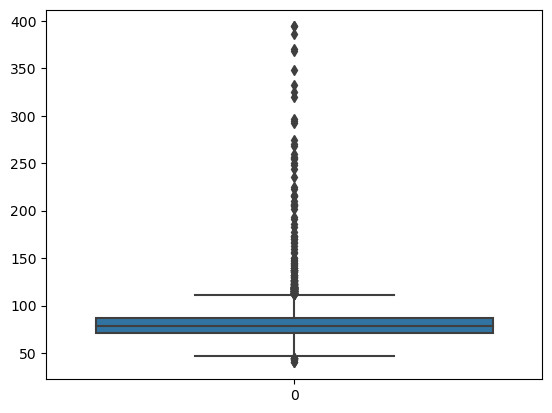

In [830]:
sns.boxplot(df.glucose)

In [831]:
#df.glucose.quantile(0.05)
#df.glucose.quantile(0.96)

df = df[(df.glucose >= df.glucose.quantile(0.05)) & (df.glucose <= df.glucose.quantile(0.95))]

<Axes: >

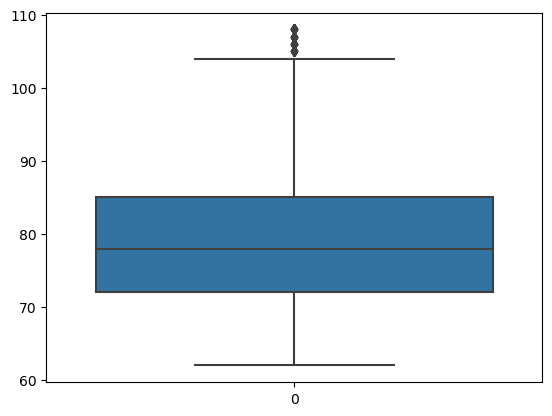

In [832]:
sns.boxplot(df.glucose)

In [833]:
df.glucose.fillna(df.glucose.mean())

0        77.0
1        76.0
2        70.0
3       103.0
4        85.0
        ...  
4232     79.0
4233     86.0
4234     68.0
4235     86.0
4237    107.0
Name: glucose, Length: 3474, dtype: float64

In [834]:
df

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4232,1,68,1.0,0,0.0,0.0,0,1,0,176.0,168.0,97.0,23.14,60.0,79.0,1
4233,1,50,1.0,1,1.0,0.0,0,1,0,313.0,179.0,92.0,25.97,66.0,86.0,1
4234,1,51,3.0,1,43.0,0.0,0,0,0,207.0,126.5,80.0,19.71,65.0,68.0,0
4235,0,48,2.0,1,20.0,NaN,0,0,0,248.0,131.0,72.0,22.00,84.0,86.0,0


In [835]:
df.glucose.describe(percentiles=(0.05, 0.25, 0.50, 0.75, 0.96))

count    3474.000000
mean       79.386874
std        10.091634
min        62.000000
5%         65.000000
25%        72.000000
50%        78.000000
75%        85.000000
96%       100.000000
max       108.000000
Name: glucose, dtype: float64

In [836]:
(df.isna().sum() / len(df.male)) * 100

male               0.000000
age                0.000000
education          2.533103
currentSmoker      0.000000
cigsPerDay         0.690846
BPMeds             1.352907
prevalentStroke    0.000000
prevalentHyp       0.000000
diabetes           0.000000
totChol            0.230282
sysBP              0.000000
diaBP              0.000000
BMI                0.374208
heartRate          0.028785
glucose            0.000000
TenYearCHD         0.000000
dtype: float64

In [837]:
df.education.describe()

count    3386.000000
mean        1.991435
std         1.023902
min         1.000000
25%         1.000000
50%         2.000000
75%         3.000000
max         4.000000
Name: education, dtype: float64

In [838]:
df.education = df.education.fillna(2.0)

In [839]:
(df.isna().sum() / len(df.male)) * 100

male               0.000000
age                0.000000
education          0.000000
currentSmoker      0.000000
cigsPerDay         0.690846
BPMeds             1.352907
prevalentStroke    0.000000
prevalentHyp       0.000000
diabetes           0.000000
totChol            0.230282
sysBP              0.000000
diaBP              0.000000
BMI                0.374208
heartRate          0.028785
glucose            0.000000
TenYearCHD         0.000000
dtype: float64

In [840]:
df.dropna(inplace=True)

In [841]:
(df.isna().sum() / len(df.male)) * 100

male               0.0
age                0.0
education          0.0
currentSmoker      0.0
cigsPerDay         0.0
BPMeds             0.0
prevalentStroke    0.0
prevalentHyp       0.0
diabetes           0.0
totChol            0.0
sysBP              0.0
diaBP              0.0
BMI                0.0
heartRate          0.0
glucose            0.0
TenYearCHD         0.0
dtype: float64

In [842]:
# sns.countplot(df.TenYearCHD)
# (df.TenYearCHD.values == 0) == True
df['TenYearCHD'].eq(1).sum()

494

In [843]:
y = df.pop("TenYearCHD")
x = df

In [844]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import statsmodels.api as sm
from sklearn.preprocessing import MinMaxScaler
from statsmodels.stats.outliers_influence import variance_inflation_factor as vf

In [845]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=100)

In [846]:
x_train_sm = sm.add_constant(x_train)
# lr = LogisticRegression()
lr = LogisticRegression(penalty='l2', solver='liblinear', C=1.0)
lr_model = lr.fit(x_train_sm, y_train)

In [847]:
vif = pd.DataFrame()
vif['Features'] = x_train_sm.columns
vif['VIF'] = [vf(x_train_sm.values, i) for i in range(x_train_sm.shape[1])]
vif

,Features,VIF
0,const,238.282324
1,male,1.209747
2,age,1.362340
3,education,1.059362
4,currentSmoker,2.717968
5,cigsPerDay,2.838896
6,BPMeds,1.094498
7,prevalentStroke,1.018407
8,prevalentHyp,2.051916
9,diabetes,1.011408


In [848]:
test_pred = lr_model.predict(x_train_sm)

In [849]:
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import confusion_matrix

In [850]:
confusion_matrix(test_pred, y_train)

array([[2296,  377],
       [  16,   15]], dtype=int64)

In [851]:
acc = accuracy_score(test_pred,y_train)
prec = precision_score(test_pred,y_train)
f1s = f1_score(test_pred,y_train)

In [852]:
acc

0.8546597633136095

In [853]:
prec

0.03826530612244898

In [854]:
f1s

0.07092198581560284